In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import numpy as np


In [74]:
df = pd.read_pickle('df_num')

In [98]:
k = 10
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df)

In [99]:
y_pred is kmeans.labels_

y_pred


array([4, 4, 4, ..., 4, 4, 4])

In [100]:
kmeans.cluster_centers_

array([[ 4.85325450e+02,  2.89957894e+00, -4.39437530e+00,
         8.72960879e+00,  3.21249337e+00, -4.39437530e+00,
         1.13081149e+02,  6.19524618e+00,  2.57328806e+00,
         7.80022637e+00,  1.26149643e+02,  4.86510475e+01,
         3.65478212e+00,  7.45897001e-01],
       [ 4.44290651e+03, -1.82340000e+01, -3.44942715e+00,
         3.01417536e+00,  9.78485882e+00, -3.44942715e+00,
         1.84994533e+03,  7.64666667e+01,  5.86666667e+01,
         1.27866667e+02,  1.11283933e+03,  4.12517394e+02,
         1.37333333e+01,  1.11022302e-16],
       [ 9.31752910e+02,  1.74809798e+00, -4.14457262e+00,
         6.82343998e+00,  3.21365092e+00, -4.14457262e+00,
         2.85740346e+02,  1.44495677e+01,  7.53602305e+00,
         1.74697406e+01,  2.24689280e+02,  9.07183862e+01,
         4.74063401e+00,  2.59365994e-02],
       [ 1.54706601e+02,  5.97201869e-02, -1.41300058e+00,
         7.72614719e+00,  2.09969043e+00, -1.41300058e+00,
         5.61722243e+01,  2.77990654e+00,  1.

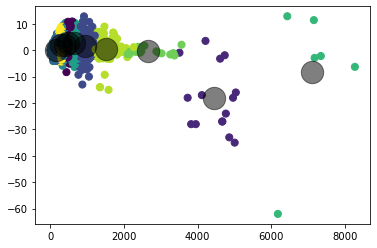

In [101]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

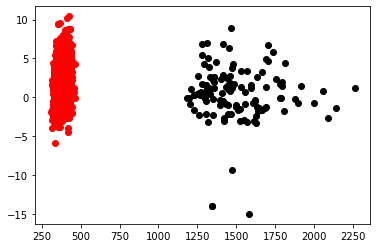

In [105]:
#filter rows of original data
filtered_label2 = df[y_pred == 4]
 
filtered_label8 = df[y_pred == 8]
 
#Plotting the results
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'red')
plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1] , color = 'black')
plt.show()

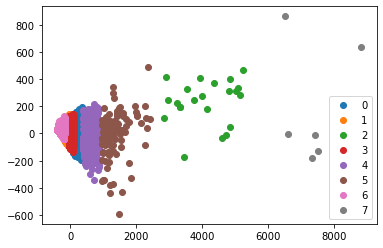

In [109]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data

pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 8)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()